## Z-test

Это семейство статистических тестов, где исследуемая статистика (например выборочное среднее) подчиняется нормальному распределению.

Полезные ссылки:
- [Z-Test Simply Explained](https://towardsdatascience.com/z-test-simply-explained-80b346e0e239)
- [Один образец Z-теста: определение, формула и пример](https://www.codecamp.ru/blog/one-sample-z-test/)
- [Z test — Demystified](https://medium.com/analytics-vidhya/z-test-demystified-f745c57c324c)

### Тест на разницу выборочного среднего и среднего генеральной совокупности (одновыборочный тест)

Используется для определения статистически значима ли разница между **выборочным средним** и **средним генеральной совокупности**.

Согласно центральной предельной теореме (**ЦПТ**), **распределение выборочных средних $\overline{X} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$, сэмплированных из генеральной совокупности c параметрами $\mu$ и $\sigma^2$ выборок размера $n$, соответствует нормальному распределению $N(\mu, \sigma^2_{\overline{x}})$**. Причем:

$$
E \left ( \overline{X} \right ) = \mu
$$

$$
\sigma_{\overline{X}} = \frac{\sigma}{\sqrt{n}}
$$

Т.е. с ростом размера выборки $n$ выборочное среднее $\overline{X}$ стремится к среднему генеральной совокупности $\mu$, а выборочное стандартное отклонение $\sigma_{\overline{X}}$ (также называется выборочной стандартной ошибкой среднего - $\text{SE}_{\overline{X}}$) уменьшается.

Покажем это на эксперименте.

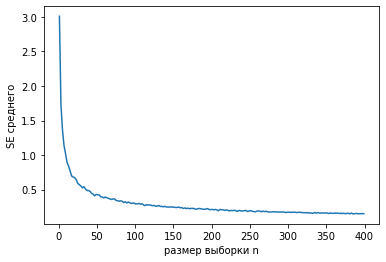

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# параметры распределения генеральной совокупности
mu_population, sigma_population = 25, 3

# размеры выборок
ns = np.arange(1, 400, 2)

# количество выборок
n_samples = 1000

ses = list()
for n in ns:
    # сгенерируем n_samples выборок размера n из генеральной совокупности
    samples = stats.norm.rvs(loc=mu_population, scale=sigma_population, size=(n_samples, n))
    
    # посчитаем выборочные средние
    samples_mean = samples.mean(axis=1)
    
    # посчитаем стандартную ошибку среднего
    se = samples_mean.std()
    ses.append(se)
    
ax = sns.lineplot(x=ns, y=ses)
ax.set_xlabel(xlabel="размер выборки n")
ax.set_ylabel(ylabel="SE среднего");

Экспериментально показано, что с ростом размера выборки $SE_{\overline{X}}$ уменьшается. Но после некоторого значения размера выборки значение $SE_{\overline{X}}$ меняется не сильно. Таким образом, при достижении некоторого размера выборки ее дальнейшее увеличение уже почти не сказывается на точности средней. Этот факт имеет далеко идущие последствия. Например, при проведении выборочного обследования населения (опроса) чрезмерное увеличение выборки ведет к неоправданным затратам, т.к. точность почти не меняется. Именно поэтому количество опрошенных редко превышает 1,5 тысячи человек. Точность при таком размере выборки часто является достаточной, а дальнейшее увеличение выборки – нецелесообразным.

Вернемся к Z-тесту. Как было уже сказано, $\overline{X} \sim N \left ( \mu, \sigma^2_{\overline{X}} \right )$. Приведем данную величину выборочного среднего к стандартному нормальному распределению $N(0, 1) \Rightarrow$ получим Z статистику:

$$
z = \frac{\overline{X} - \mu}{\sigma_{\overline{X}}} = \frac{\overline{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N \left (0, 1 \right )
$$

Существуют несколько вариантов постановки гипотез Z-теста:
1. Двусторонний Z-тест

$$
\begin{equation*}
\begin{cases}
H_{0}: \overline{X} = \mu , \left ( \text{выборочное среднее равно среднему генеральной совокупности} \right ) \\
H_{1}: \overline{X} \neq \mu , \left ( \text{выборочное среднее НЕ равно среднему генеральной совокупности} \right )
\end{cases}
\end{equation*}
$$

Критическая область: $(- \infty, z_{\alpha / 2}) \cup (z_{1 - \alpha / 2}, + \infty)$

2. Левосторонний Z-тест

$$
\begin{equation*}
\begin{cases}
H_{0}: \overline{X} \geq \mu , \left ( \text{выборочное среднее больше либо равно среднему генеральной совокупности} \right ) \\
H_{1}: \overline{X} < \mu , \left ( \text{выборочное среднее меньше среднего генеральной совокупности} \right )
\end{cases}
\end{equation*}
$$

Критическая область: $(- \infty, z_{\alpha})$

3. Правосторонний Z-тест

$$
\begin{equation*}
\begin{cases}
H_{0}: \overline{X} \leq \mu , \left ( \text{выборочное среднее меньше либо равно среднему генеральной совокупности} \right ) \\
H_{1}: \overline{X} > \mu , \left ( \text{выборочное среднее больше среднего генеральной совокупности} \right )
\end{cases}
\end{equation*}
$$

Критическая область: $(z_{1 - \alpha}, + \infty)$

**Чтобы результаты Z-теста были достоверными, должны выполняться следующие условия:**
- данные непрерывны (не дискретны)
- размер выборки должен быть больше 30
- данные представляют собой **простую случайную выборку** (выборка сформирована таким образом, что каждый член генеральной совокупности имеет равные шансы попасть в выборку)
- данные в генеральной совокупности распределены нормально
- $\sigma$ генеральной совокупности известна ($\sigma$ в идеале должна соответствовать теоретическому распределению наших данных из генеральной совокупности, но т.к. в реальной жизни теоретическое распределение мы не можем знать, то $\sigma$ оцеинвается из генеральной совокупности. Например, мы имеем данные по уровню IQ для населения некоторой страны. По этим данным и определяем $\sigma$ - см. пример ниже)

Разберем на **примере**

Ученый хочет определить, влияет ли его лекарство на уровень IQ. Известно, что данные по IQ населения распределены нормально с параметрами $\mu = 100$ и $\sigma = 15$.

Он выбрал 50 испытуемых, которые на протяжении месяца принимали лекарство. По прошествии месяца ученый проверил их IQ и получил следующие результаты:

In [78]:
import scipy.stats as stats


sample = stats.norm.rvs(loc=102, scale=15, size=(50, ), random_state=42)
sample = sample.round().astype("int")
print("Уровни IQ 50-ти испытуемых:")
print(*sample)

Уровни IQ 50-ти испытуемых:
109 100 112 125 98 98 126 114 95 110 95 95 106 73 76 94 87 107 88 81 124 99 103 81 94 104 85 108 93 98 93 130 102 86 114 84 105 73 82 105 113 105 100 97 80 91 95 118 107 76


Постановка гипотез для проведения Z-теста (двусторонний тест):

$$
\begin{equation*}
\begin{cases}
H_{0}: \text{лекарство НЕ оказывает влияния на уровень IQ} \\
H_{1}: \text{лекарство оказывает влияние на уровень IQ}
\end{cases}
\end{equation*}
$$

Выбираем уровень значимости теста $\alpha = 0.05$

Рассчитаем статистику:

In [79]:
z_score = (np.mean(sample) - 100) / (15 / np.sqrt(50))
print("Значение статистики z = {:.4f}".format(z_score))

Значение статистики z = -0.6223


Теперь по полученному значению Z статистики необходимо определить значение `p-value`

In [80]:
# т.к. тест двусторонний, то мы учитываем значения для обоих хвостов распределения
p_value = stats.norm.cdf(-abs(z_score)) + (1 - stats.norm.cdf(abs(z_score)))
print("Значение p-value = {:.4f}".format(p_value))

Значение p-value = 0.5338


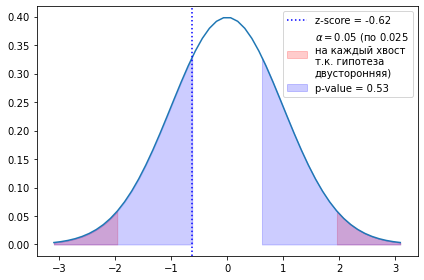

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


fig, ax = plt.subplots()
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999))
y = stats.norm.pdf(x)

x_left = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.025))
y_left = stats.norm.pdf(x_left)

x_right = np.linspace(stats.norm.ppf(0.975), stats.norm.ppf(0.999))
y_right = stats.norm.pdf(x_right)

p_value_x_left = np.linspace(stats.norm.ppf(0.001), -abs(z_score))
p_value_y_left = stats.norm.pdf(p_value_x_left)

p_value_x_right = np.linspace(abs(z_score), stats.norm.ppf(0.999))
p_value_y_right = stats.norm.pdf(p_value_x_right)

sns.lineplot(x=x, y=y, ax=ax)
ax.fill_between(
    x=x_left, y1=np.zeros_like(y_left), y2=y_left, color="red", alpha=0.2, 
    label="$\\alpha = 0.05$ (по 0.025\nна каждый хвост\nт.к. гипотеза\nдвусторонняя)")
ax.fill_between(x=x_right, y1=np.zeros_like(y_right), y2=y_right, color="red", alpha=0.2)
ax.fill_between(
    x=p_value_x_left, y1=np.zeros_like(p_value_y_left), y2=p_value_y_left, color="blue", alpha=0.2,
    label="p-value = {:.2f}".format(p_value))
ax.fill_between(x=p_value_x_right, y1=np.zeros_like(p_value_y_right), y2=p_value_y_right, color="blue", alpha=0.2)
ax.axvline(x=z_score, color="blue", ls=":", label="z-score = {:.2f}".format(z_score))
fig.tight_layout()
ax.legend();

`p-value` >> $\alpha \Rightarrow$ мы НЕ отвергаем $H_{0}$

**statsmodels**

В библиотеке **statsmodels** также имеется инструмент для проведения Z-теста - функция `ztest`. Аргументы функции:
- `x1` - выборка
- `value` - значение, равенство выброчного среднего которому необходимо оценить
- `alternative` - тип гипотезы (двусторонняя, правосторонняя, левосторонняя) - см. документацию
- `usevar` - в настоящий момент реализована только функция оценки дисперсии генеральной совокупности по выборке `x1` (нельзя передать значение)

In [82]:
from statsmodels.stats.weightstats import ztest


z_score, p_value = ztest(x1=sample, value=100, alternative="two-sided")
print("Значение z статистики:\t{:.4f}".format(z_score))
print("Значение p-value:\t{:.4f}".format(p_value))

Значение z статистики:	-0.6661
Значение p-value:	0.5053


### Двувыборочный Z-тест на разницу средних

Пусть, у нас имеется две выборки $X_{1} = x_{1}^{(1)}, x_{2}^{(1)}, \ldots , x_{n_{1}}^{(1)}$ и $X_{2} = x_{1}^{(2)}, x_{2}^{(2)}, \ldots , x_{n_{2}}^{(2)}$ размера $n_{1}$ и $n_{2}$ соответственоо. Необходимо проверить гипотезу о разнице средних этих двух выборок.

Т.к. согласно ЦПТ средневыборочные распределены нормально, то и их разница также распределена нормально (по свойству бесконечной делимости нормального распределения) с $\text{E} \left ({\overline{X}_1 - \overline{X}_2} \right ) = 
\text{E} \left ({\overline{X}_1} \right ) - \text{E} \left ({\overline{X}_2} \right ) = \mu_{1} - \mu_{2}$

Что касается дисперсии, то дисперсия разности двух нормально распределенных СВ равна

$$
\text{D} \left ({\overline{X}_1 - \overline{X}_2} \right ) = 
\text{D} \left ({\overline{X}_1} \right ) + \text{D} \left ({\overline{X}_2} \right ) = 
\frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2} \Rightarrow
\sigma_{{\overline{X}_1 - \overline{X}_2}} = \sqrt{ \frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2} }
$$

Тогда статистика будет иметь вид (в общем виде):

$$
z = \frac{ \left ( \overline{X}_1 - \overline{X}_2 \right ) - \left ( \mu_1 - \mu_2 \right ) }{ \sqrt{ \frac{\sigma_{1}^{2}}{n_1} + \frac{\sigma_{2}^{2}}{n_2} } }
$$

Гипотезы формулируются абсолютно таким же образом как и при одновыборочном тесте. Рассмотрим в качестве примера левосторонний двувыборочный тест (опять же, на примере теста на IQ).

Есть два города, город А и город Б. Ученый хочет выяснить, действительно ли средний уровень IQ в городе А выше среднего уровня IQ в городе Б. Известно, что данные по IQ населения распределены нормально с параметрами $\mu = 100$ и $\sigma = 15$. Он выбрал по 50 испытуемых из каждого города и проверил их уровень IQ с помощью теста. Он получил следующие результаты:

In [59]:
import pandas as pd
import numpy as np
import scipy.stats as stats


a_sample = stats.norm.rvs(loc=108, scale=15, size=50, random_state=42)
b_sample = stats.norm.rvs(loc=98, scale=15, size=50, random_state=1)
a_sample, b_sample = a_sample.round().astype("int"), b_sample.round().astype("int")
df = pd.DataFrame(data={"А": a_sample, "Б": b_sample}).T

print("Результаты тестирования:")
display(df)

Результаты тестирования:


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
А,115,106,118,131,104,104,132,120,101,116,...,119,111,106,103,86,97,101,124,113,82
Б,122,89,90,82,111,63,124,87,103,94,...,95,85,87,123,99,88,101,130,100,107


Сформулируем гипотезы:

$$
\begin{equation*}
\begin{cases}
H_{0}: \text{средний уровень IQ в городе А НЕ выше чем в городе Б} \\
H_{1}: \text{средний уровень IQ в городе А выше чем в городе Б}
\end{cases}
\end{equation*}
$$

Это правосторонний тест. Критическая область - $(z_{1 - \alpha}, + \infty)$.Уровень значимости: $\alpha = 0.05$

Рассчитаем значение статистики и значение `p-value`

In [63]:
z_score = (np.mean(df.loc["А", :]) - np.mean(df.loc["Б", :])) / (np.sqrt((15**2 / 50) + (15**2 / 50)))
p_value = 1 - stats.norm.cdf(z_score)

print("Значение статистики\tz = {:.4f}".format(z_score))
print("Значение\t\tp-value = {:.4f}".format(p_value))

Значение статистики	z = 2.3400
Значение		p-value = 0.0096


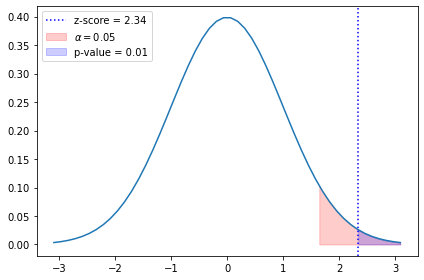

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


fig, ax = plt.subplots()
x = np.linspace(stats.norm.ppf(0.001), stats.norm.ppf(0.999))
y = stats.norm.pdf(x)

x_right = np.linspace(stats.norm.ppf(0.95), stats.norm.ppf(0.999))
y_right = stats.norm.pdf(x_right)

p_value_x_right = np.linspace(z_score, stats.norm.ppf(0.999))
p_value_y_right = stats.norm.pdf(p_value_x_right)

sns.lineplot(x=x, y=y, ax=ax)
ax.fill_between(
    x=x_right, y1=np.zeros_like(y_right), y2=y_right, color="red", alpha=0.2, 
    label="$\\alpha = 0.05$")
ax.fill_between(
    x=p_value_x_right, y1=np.zeros_like(p_value_y_right), y2=p_value_y_right, color="blue", alpha=0.2,
    label="p-value = {:.2f}".format(p_value))
ax.axvline(x=z_score, color="blue", ls=":", label="z-score = {:.2f}".format(z_score))
fig.tight_layout()
ax.legend();

`p-value` < $\alpha \Rightarrow$ отвергаем $H_{0}$

**statsmodels**

Аналогично можно воспользоваться иниструментом из библиотеки **statsmodels**

In [77]:
from statsmodels.stats.weightstats import ztest


z_score, p_value = ztest(x1=df.loc["А", :], x2=df.loc["Б", :], value=0, alternative="larger")
print("Значение z статистики:\t{:.4f}".format(z_score))
print("Значение p-value:\t{:.4f}".format(p_value))

Значение z статистики:	2.4419
Значение p-value:	0.0073


В двувыборочном тесте `value` - это разница между средними генеральных совокупностей, а именно $\mu_{1} - \mu_{2}$!

## $t$-тест (тест Стьюдента)

Является "аналогом" $Z$-теста для случая, когда дисперсия генеральной совокупности неизвестна и оценивается по выборке. При этом статистика данного теста - $t$-статистика - имеет распределение Стьюдента $t(k)$ с $k$ степенями свободы. Это распределение асимптотически сходится к стандартному нормальному распределению (т.е. с размером выборки $n \rightarrow \infty$ рапределение нашей статистики $t \sim t(n - 1) \rightarrow N \left ( 0, 1 \right )$ по свойству распределения Стьюдента). Это распределение имеет более "тяжелые" хвосты, поэтому доверительный интервал более "надежный" (широкий) по сравнению со стандартным нормальным распределением.


<hr>

Как и $Z$-тест, $t$-тест имеет различные вариации. С точки зрения количества выборок:
- **одновыборочный**, для оценки разницы между выборочным средним и теоретическим средним генеральной совокупности.

_Например, мы изготавливаем детали на производстве. И номинальный размер детали - $\mu$. Мы измеряли $n$ деталей и получили некоторую выборку $x_{1}, \ldots , x_{n}$ результатов измерений. Для оценки разницы между выборочным средним и номинальным размером воспользуемся $t$-тестом._

$t$-статистика для одновыборочного теста (вывод этой формулы см. [ноутбук](./distributions.ipynb), распределение Стьюдента):

$$
t = \frac{\overline{X}_n - \mu}{\frac{S_{n}}{\sqrt{n}}} \sim t \left (n - 1 \right )
$$

где $S_{n}^{2} = \frac{1}{n - 1} \sum_{i=0}^{n} \left ( X_{i} - \overline{X}_{n} \right )^2$ - несмещенная оценка дисперсии

- **двухвыборочный** для двух **независимых** выборок, для оценки разницы выборочных средних $\overline{X}_{1}$ и $\overline{X}_{2}$. $S_{1}^{2}$ и $S_{2}^{2}$ - несмещенные оценки дисперсий этих выборок.

_Например, мы разработали лекарство, которое повышает уровень гемоглобина в крови. Мы выбрали две группы людей размера $n_1$ и $n_2$ соответственно. Одной группе на протяжении недели давали плацебо, другой - наше лекарство. Затем измеряли уровень гемоглобина (по сути мы провели АВ тестирование). Для оценки разницы между этими двумя выборочными средними воспользуемся $t$-тестом._

Статистика для двухвыборочного $t$-теста, когда когда предполагается, что дисперсии генеральных совокупностей равны:

$$
t = \frac{\overline{X}_1 - \overline{X}_2}{S_{x} \sqrt{ \frac{1}{n_1} + \frac{1}{n_2} }} \sim t \left ( n_1 + n_2 - 2 \right )
$$

$$
S_{x} = \sqrt{\frac{\left ( n_1 - 1 \right ) S_1^2 + \left ( n_2 - 1 \right ) S_2^2}{n_1 + n_2 - 2}}
$$

Статистика для двухвыборочного $t$-теста, когда когда предполагается, что дисперсии генеральных совокупностей **НЕ** равны (**$t$-тест Уэлча**):

$$
t = \frac{\overline{X}_1 - \overline{X}_2}{\sqrt{ \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} }} \sim 
t \left ( d \right )
$$

$$
d = \frac{\left ( \frac{S_{1}^{2}}{n_1} +\frac{S_{2}^{2}}{n_2} \right )^2}{\frac{\left ( \frac{S_{1}^{2}}{n_1} \right )^2}{ n_1 - 1} + \frac{\left ( \frac{S_{2}^{2}}{n_2} \right )^2}{ n_2 - 1}}
$$

- **двухвыборочный** для двух **зависимых** выборок

<hr>

С точки зрения постановки нулевой и альтернативной гипотез (на примере одновыборочного $t$-критерия):
- **двусторонний** $t$-тест

$$
\begin{equation*}
\begin{cases}
H_{0}: \overline{X} = \mu , \left ( \text{выборочное среднее равно среднему генеральной совокупности} \right ) \\
H_{1}: \overline{X} \neq \mu , \left ( \text{выборочное среднее НЕ равно среднему генеральной совокупности} \right )
\end{cases}
\end{equation*}
$$

Критическая область: $(- \infty, t_{\alpha / 2}) \cup (t_{1 - \alpha / 2}, + \infty)$

- **левосторонний** $t$-тест

$$
\begin{equation*}
\begin{cases}
H_{0}: \overline{X} \geq \mu , \left ( \text{выборочное среднее больше либо равно среднему генеральной совокупности} \right ) \\
H_{1}: \overline{X} < \mu , \left ( \text{выборочное среднее меньше среднего генеральной совокупности} \right )
\end{cases}
\end{equation*}
$$

Критическая область: $(- \infty, t_{\alpha})$

- **правосторонний** $t$-тест

$$
\begin{equation*}
\begin{cases}
H_{0}: \overline{X} \leq \mu , \left ( \text{выборочное среднее меньше либо равно среднему генеральной совокупности} \right ) \\
H_{1}: \overline{X} > \mu , \left ( \text{выборочное среднее больше среднего генеральной совокупности} \right )
\end{cases}
\end{equation*}
$$

Критическая область: $(t_{1 - \alpha}, + \infty)$

### Задачи

В качестве примера решим две задачи на синтетических данных.

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union

import warnings
warnings.filterwarnings("ignore")

#### Задача 1

Первая задача на одновыборочный $t$-тест (левосторонний). Имеется выборка $x_1, \ldots , x_n$, сгенерированная из нормального распредления $N(\mu, \sigma^2)$ с параметрами $\mu = -0.2, \sigma^2 = 3$. Необходимо проверить нулевую гипотезу $H_0: E \left ( X \right ) \geq 0$ на уровне значимости $\alpha = 0.05$. Тогда альтернативная гипотеза $H_1: E \left ( X \right ) < 0$.

In [4]:
def inbiased_variance(nums: np.array) -> float:
    """
    Расчет несмещенной оценки дисперсии.
    """
    return (1 / (nums.shape[0] - 1))*np.sum(np.power(nums - np.mean(nums), 2))


def student_single(sample: np.array, expectation: Union[float, int] = 0) -> float:
    """
    Одновыборочный критерий стьюдента.
    Возвращает значение статистики и количество степеней свободы.
    """
    # несмещенная оценка дисперсии
    uv, df = inbiased_variance(nums=sample), sample.shape[0]
    return (np.mean(sample) - expectation) / (np.sqrt(uv / df)), df - 1


n, loc, scale, alpha = 100, -0.2, 3**0.5, 0.05
sample = stats.norm.rvs(loc=loc, scale=scale, size=(n), random_state=42)
statistic, df = student_single(sample=sample, expectation=0)
p_value = stats.t.cdf(statistic, df=df)
print("Значение t-статистики: {:.4f}".format(statistic))
print("Значение p-value: {:.4f}".format(p_value))
print(f"Количество степеней свободы: {df}")

Значение t-статистики: -2.4149
Значение p-value: 0.0088
Количество степеней свободы: 99


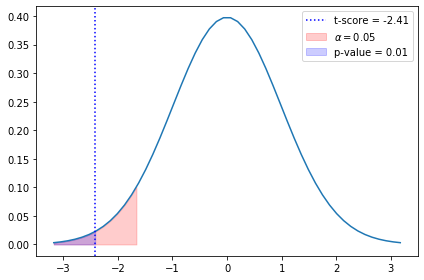

In [5]:
fig, ax = plt.subplots()
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df))
y = stats.t.pdf(x, df=df)

x_left = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(alpha, df=df))
y_left = stats.t.pdf(x_left, df=df)

p_value_x_left = np.linspace(stats.t.ppf(0.001, df=df), statistic)
p_value_y_left = stats.t.pdf(p_value_x_left, df=df)

sns.lineplot(x=x, y=y, ax=ax)
ax.fill_between(
    x=x_left, y1=np.zeros_like(y_left), y2=y_left, color="red", alpha=0.2, 
    label="$\\alpha = 0.05$")
ax.fill_between(
    x=p_value_x_left, y1=np.zeros_like(p_value_y_left), y2=p_value_y_left, color="blue", alpha=0.2,
    label="p-value = {:.2f}".format(p_value))
ax.axvline(x=statistic, color="blue", ls=":", label="t-score = {:.2f}".format(statistic))
fig.tight_layout()
ax.legend();

`p-value` $ < \alpha \Rightarrow $ отвергаем нулевую гипотезу

**scipy**

In [7]:
statistic, p_value = stats.ttest_1samp(a=sample, popmean=0, alternative="less")
print("Значение t-статистики: {:.4f}".format(statistic))
print("Значение p-value: {:.4f}".format(p_value))

Значение t-статистики: -2.4149
Значение p-value: 0.0088


#### Задача 2

Мы разработали новое лекарство, которое, как мы предполагаем, снижает уровень холестерина у больных генетическим заболеванием людей. Для оценки эффективности лекарства мы сэмплировали две группы добровольцев. Одна группа принимала плацебо, другая - наше лекарство. Сформулируем нулевую и альтернативную гипотезы:

$$
\begin{equation*}
\begin{cases}
H_{0}: \text{лекарство не помогает снизить уровень холестерина} \\
H_{1}: \text{лекарство помогает снизить уровень холестерина}
\end{cases}
\end{equation*}
$$

Уровень значимости $\alpha = 0.05$

Для решения данной задачи будем использовать двухвыборочный $t$-критерий для двух независимых выборок - $t$-тест Уэлча, т.к. нам ничего не известно о равенстве дисперсий.

In [13]:
def df_calculation(
    v1: Union[int, float], v2: Union[int, float], n1: Union[int, float], n2: Union[int, float]) -> Union[int, float]:
    """
    Расчет количество степеней свободы
    """
    return np.power(v1/n1 + v2/n2, 2) / (np.power(v1/n1, 2)/(n1 - 1) + np.power(v2/n2, 2)/(n2 - 1))


def student_ind(x_sample: np.array, y_sample: np.array):
    nx, ny = x_sample.shape[0], y_sample.shape[0]
    vx, vy = inbiased_variance(nums=x_sample), inbiased_variance(nums=y_sample)
    df = df_calculation(v1=vx, v2=vy, n1=nx, n2=ny)
    return (np.mean(x_sample) - np.mean(y_sample))/np.sqrt(vx/nx + vy/ny), df


# генерируем выборки
nx, xloc, xscale = 100, 86, 16
ny, yloc, yscale = 80, 82, 22
x_sample = stats.norm.rvs(loc=xloc, scale=xscale, size=nx, random_state=42)
y_sample = stats.norm.rvs(loc=yloc, scale=yscale, size=ny, random_state=1)

# рассчитываем статистику и степень свободы распределения
statistic, df = student_ind(x_sample=x_sample, y_sample=y_sample)

# рассчитываем p-value и выводим результаты
p_value = stats.t.cdf(statistic, df=df)
print("Значение t-статистики: {:.4f}".format(statistic))
print("Значение p-value: {:.4f}".format(p_value))
print(f"Количество степеней свободы: {df}")

Значение t-статистики: 0.4499
Значение p-value: 0.6733
Количество степеней свободы: 134.55901281388535


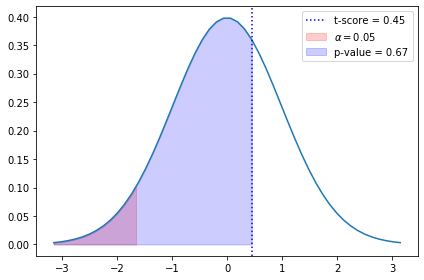

In [14]:
fig, ax = plt.subplots()
x = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(0.999, df=df))
y = stats.t.pdf(x, df=df)

x_left = np.linspace(stats.t.ppf(0.001, df=df), stats.t.ppf(alpha, df=df))
y_left = stats.t.pdf(x_left, df=df)

p_value_x_left = np.linspace(stats.t.ppf(0.001, df=df), statistic)
p_value_y_left = stats.t.pdf(p_value_x_left, df=df)

sns.lineplot(x=x, y=y, ax=ax)
ax.fill_between(
    x=x_left, y1=np.zeros_like(y_left), y2=y_left, color="red", alpha=0.2, 
    label="$\\alpha = 0.05$")
ax.fill_between(
    x=p_value_x_left, y1=np.zeros_like(p_value_y_left), y2=p_value_y_left, color="blue", alpha=0.2,
    label="p-value = {:.2f}".format(p_value))
ax.axvline(x=statistic, color="blue", ls=":", label="t-score = {:.2f}".format(statistic))
fig.tight_layout()
ax.legend();

`p-value` $ > \alpha \Rightarrow $ нет оснований для того, чтобы отвергнеуть нулевую гипотезу. Нет доказательств того, что лекарство помогает.

**scipy**

In [15]:
statistic, p_value = stats.ttest_ind(a=x_sample, b=y_sample, equal_var=False, alternative="less")
print("Значение t-статистики: {:.4f}".format(statistic))
print("Значение p-value: {:.4f}".format(p_value))

Значение t-статистики: 0.4499
Значение p-value: 0.6733


## Критерий согласия Пирсона (критерий согласия хи-квадрат)

Также называется критерием **согласия $\chi^{2}$**.

Это **непараметрический** метод, позволяющий оценить значимость различий между фактическим (выявленным в результате исследования) количеством исходов или качественных характеристик выборки, попадающих в каждую категорию, и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы.

Наиболее употребляемый критерий для проверки гипотезы о принадлежности наблюдаемой выборки $x_1, x_2, \ldots, x_n$ объемом $n$ некоторому теоретическому закону распределения $Z$.

$$
\begin{equation*}
\begin{cases}
H_{0}: X \sim Z\\
H_{1}: X \nsim Z
\end{cases}
\end{equation*}
$$

К примеру, у нас есть выборка размера $n = 1000$. И мы предполагаем, что данная выборка принадлежит рапределению $N(-2, 5)$.

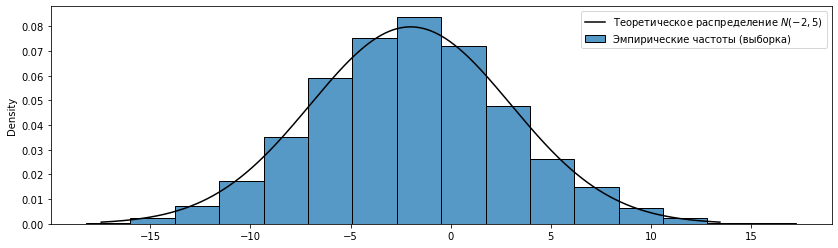

In [1]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Union

import warnings
warnings.filterwarnings("ignore")


n = 1000
loc, scale = -2, 5

# генерируем псевдослучайную выборку для проведения эксперимента
sample = stats.norm.rvs(loc=-2, scale=5, size=n, random_state=42)

# функция плотности теоретического распределения, принадлежность нашей выборки к которому мы хотим проверить
x = np.linspace(
    stats.norm.ppf(0.001, loc=loc, scale=scale),
    stats.norm.ppf(0.999, loc=loc, scale=scale), 1000
)
y = stats.norm.pdf(x, loc=loc, scale=scale)

fig, ax = plt.subplots(figsize=(14, 4))
sns.histplot(sample, stat="density", bins=16, ax=ax)
sns.lineplot(x=x, y=y, ax=ax, c="black")
ax.legend([
    "Теоретическое распределение $N(-2, 5)$", 
    "Эмпирические частоты (выборка)"], loc=1)
fig.show()

Как мы видим, между **эмпирическими частотами** и **теоретическим распределением** существует разница. И возникает вопрос, **объясняются ли эти расхождения только случайными обстоятельствами, или же они являются следствием того, теоретическое распределение плохо описывает природу наших данных?**

Карл Пирсон разработал математический инструмент проверки нулевой гипотезы $H_0$, что **теоретическая кривая корректно описывает экспериментальные данные гистограммы** - критерий согласия хи-квадрат (или критерий соласия Пирсона). Основан на оценке степени близости гистограммы относительных частот выборки и теоретической плотности распределения.

Под относительной частотой понимается величина:

$$
\overline{p}_i = \frac{m_i}{n}
$$

Причем 

$$
\sum_{i=1}^{k} \overline{p}_{i} = 1
$$
$$
\sum_{i=1}^{k} m_{i} = n
$$

где

- $i = 1, 2, \ldots, k$ - индекс интервала (бина гистограммы)
- $k$ - количество интервалов (бинов гистограммы)
- $m_{i}$ - количество экспериментов для одного интервала
- $n$ - общее количество экспериментов

In [2]:
# определяем границы отрезка для разбиения на интервалы
a = min(stats.norm.ppf(0.01, loc=loc, scale=scale), np.min(sample))
b = max(stats.norm.ppf(0.99, loc=loc, scale=scale), np.max(sample))

# округлим нижнюю границу и верхнюю до целых в меньшую и большую стороны соответственно
a, b = np.floor(a), np.ceil(b)

# а также количестов бинов, на которое мы этот отрезок разобьем
n_bins = 16

print(f"Количество бинов:\t{n_bins}")
print("Отрезок, который будем разбивать на равные бины: [{}, {})".format(a, b))

Количество бинов:	16
Отрезок, который будем разбивать на равные бины: [-19.0, 18.0)


Разобьем отрезок $\left [ -19, 18 \right )$ на $k = 16$ равных отрезков $[a_0 = -19, a_1), [a_1, a_2), \ldots , [a_{k-1}, a_k = 18)$. Сформируем таблицу с частотами и относительными частотами (колонки `m` и `p_` соответственно) наших данных.

In [3]:
df = pd.DataFrame(data={"values": sample})
df["intervals"] = pd.cut(df["values"], bins=np.linspace(a, b, n_bins + 1, endpoint=True),
                         right=False)
frequences = df.groupby(by="intervals", sort=True).count()
frequences = frequences.reset_index(drop=False)
frequences = frequences.rename(columns={"values": "m"})
frequences["p_"] = frequences["m"] / n

Проверим, что $\sum_{i=1}^{k} \overline{p}_i = 1$

In [4]:
frequences["p_"].sum()

1.0

Проверим, что $\sum_{i=1}^{k} m_{i} = n$

In [5]:
frequences["m"].sum() == n

True

Отлично, теперь необходимо посчитать теоретические частоты (вероятности) нашего распределения в указанных интервалах (вероятность того, что СВ попадет в данный интервал).

In [6]:
def calculate_proba(interval: pd.Interval, loc: Union[int, float], scale: Union[int, float]) -> float:
    left, right = interval.left, interval.right
    return stats.norm.cdf(right, loc=loc, scale=scale) - stats.norm.cdf(left, loc=loc, scale=scale)


frequences["p"] = frequences["intervals"].apply(calculate_proba, loc=loc, scale=scale)
frequences["p"] = frequences["p"].astype("float")

Выведем результаты

In [7]:
frequences

,intervals,m,p_,p
0,"[-19.0, -16.688)",1,0.001,0.001317
1,"[-16.688, -14.375)",3,0.003,0.005008
2,"[-14.375, -12.062)",13,0.013,0.015427
3,"[-12.062, -9.75)",32,0.032,0.038482
4,"[-9.75, -7.438)",76,0.076,0.077815
5,"[-7.438, -5.125)",130,0.130,0.127600
6,"[-5.125, -2.812)",172,0.172,0.169510
7,"[-2.812, -0.5)",194,0.194,0.182416
8,"[-0.5, 1.812)",168,0.168,0.159178
9,"[1.812, 4.125)",102,0.102,0.112623


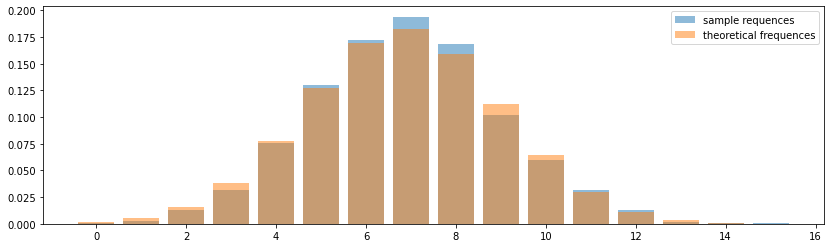

In [8]:
fig, ax = plt.subplots(figsize=(14, 4))
ax.bar(x=frequences.index, height=frequences["p_"], alpha=0.5, label="sample requences")
ax.bar(x=frequences.index, height=frequences["p"], alpha=0.5, label="theoretical frequences")
ax.legend()
fig.show()

Рассогласование выборочных частот с теоретическими можно рассматривать как $\sum_{i=1}^{k} \left ( \overline{p}_{i} - p_{i} \right )^2$ (квадрат, чтобы избежать отприцательных значений). И чем меньше эта величина, тем меньше рассогласование. 

Пирсон записал критерий согласованности в следующем виде:

$$
U = \sum_{i=1}^{k} c_{i} \left ( \overline{p_{i}} - p_{i} \right )^2
$$

где 
$$
c_{i} = \frac{n}{p_{i}}, i = 1, 2, \ldots, k
$$
вес каждого разряда

И было показано, что при достаточно больших $n$ данная величина $U$ стремится к распределнию $\chi^2(k - r - 1)$, где 
- $k - r - 1$ называется степенью свободы
- $k$ - количество разрядов (интервалов)
- $r + 1$ - число зависимых переменных

$-1$ в выражении появилась от того, что т.к. $\sum_{i=1}^{k} \overline{p_{i}} = 1 \Rightarrow \overline{p_{j}} = 1- \sum_{i=1, i \neq j}^{k} \overline{p_{i}}$, следовательно по крайней мере одно слагаемое в выражении $\sum_{i=1}^{k} c_{i} \left ( \overline{p_{i}} - p_{i} \right )^2$ является зависимым.

$r$ по умолчанию равно 0. Но если мы оценили, к примеру, мат. ожидание по выборке (т.е. хотим, чтобы теоретическое мат. ожидание соответствовало выборочному), то $r$ = 1. Если еще и дисперсию по выборке оценили, т.е

$$
E_{x} = \sum_{i=1}^{k} \widetilde{x}_{i} \overline{p}_{i}
$$

и

$$
\sigma_{x}^{2} = \sum_{i=1}^{k} \left ( \widetilde{x}_{i} - \overline{m}_x \right )^2 \overline{p}_{i}
$$

то $r=2$. Т.е. всего зависимых величин стало 3 и количесво степеней свободы: $k - 3$. Если оцениваемых по выборке параметров будет еще больше, то и $r$ будет соответствено больше.

Вернемся к нашему примеру. Рассчитаем значение статистики и проверим $H_0$ при уровне значимости $\alpha = 0.05$.

In [9]:
def chi2(f_obs: np.array, f_exp: np.array, ddof: int, n: int) -> float:
    '''
    ddof - delta degrees of freedom
    '''
    c = n / f_exp
    chi2_stat = np.sum(c*np.power(f_obs - f_exp, 2))
    p_value = 1 - stats.chi2.cdf(chi2_stat, len(f_obs) - ddof - 1)
    return chi2_stat, p_value

In [10]:
chi2_stat, p_value = chi2(f_obs=frequences["p_"].values, f_exp=frequences["p"].values, ddof=0, n=n)

print("Значение статистики:\t{:.4f}".format(chi2_stat))
print("Значение p_value:\t{:.4f}".format(p_value))

Значение статистики:	10.1010
Значение p_value:	0.8133


Как мы видим, значение `p-value` больше уровня значимости $\alpha = 0.05 \Rightarrow$ нулевую гипотезу $H_0$ не отвергаем. Т.е. мы можем сказать, что наши данные соответствуют распределению $N(-2, 5)$

**scipy**

В `scipy` уже есть готовая функция, позволяющая выполнить оценку соответствия данных некоторому распределению с помощью критерия согласия Пирсона - `scipy.stats.chisquare`. Но с некоторыми особенностями:
- в качестве аргументов `f_obs` (oserved) и `f_exp` (expected) в функцию передаются не относительные выборочные частоты и теоретические вероятности, а количества наблюдений - выборочные $m_{i}$ и теоретические, которые мы бы получили, если бы наши данные идеально бы описывали проверяемое распределение
- $\left | \sum \text{f_obs} - \sum \text{f_exp} \right | < 1e^{-8}$ - т.е. различие между между общим количеством наблюдений для `f_obs` и `f_exp` не должно превышать некий tolerance

Вернемся к нашему примеру, но на этот раз проверим, что наше распределение соответствует равномерному распределению, т.е. $X \sim U$, т.е. в кажом бине должно быть равное количество наблюдений. Сформируем нулевую и альтернативную гипотезы:

$$
\begin{equation*}
\begin{cases}
H_{0}: X \sim U\\
H_{1}: X \nsim U
\end{cases}
\end{equation*}
$$

Уровень значимости: $\alpha = 0.05$

In [36]:
single_bin_exp = n / n_bins
f_exp = np.full_like(frequences["m"], fill_value=single_bin_exp, dtype="float")

# посчитаем значение статистики и p-value с помощью библиотеки scipy
stats.chisquare(f_obs=frequences["m"].values, f_exp=f_exp, ddof=0)

Power_divergenceResult(statistic=1152.416, pvalue=2.7076716744821987e-236)

Как мы видим, значение статистики очень большое, а значение `p-value` - очень маленькое. На основании этого, мы отвергаем нулевую гипотезу $H_{0}$ и принимаем альтернативную $H_{1}$.

**Рекомендации по использованию критерия согласия Пирсона**

Из документации `scipy` по данному критерию согласия:
- общее количество отрезков (бинов) должно быть больше 13;
- для каждого отрезка (бина) количество наблюдений должно быть не менее 5. Эта рекомендация распространяется как на выборочные наблюдения, так и на теоретические. Данное правило в нашем примере мы не учитывали для упрощения подготовки данных.

Для корректного использования данного критерия согласия настоятельно рекомендуется выполнять эти требования. В противном случае следует использовать другие статистические тесты.

### Тест на гомогенность

Тест хи-квадрат также можно использовать для проверки **гомогенности** распределений двух различных групп. Рассмотрим на примере.

У нас есть две группы, каждая случайным образом сэмплирована из своей популяции (партии демократов и партии республиканцев, соответственно):
- **группа А** - представители демократической партии
- **группа Б** - представители республиканской партии

И имеется информация по каждой группе, сколько человек поддерживают новый закон, относятся нейтрально и относятся негативно. Эти данные сведены в таблицу ниже. Необходимо понять, существует ли разница в оношении к принимаемому закону в этих двух партиях на уровне значимости $\alpha = 0.05$.

$$
\begin{equation*}
\begin{cases}
H_{0}: \text{разница в отношении двух партий к принимаемму закону отсутствует} \\
H_{1}: \text{разница есть}
\end{cases}
\end{equation*}
$$

Т.е. по факту, мы проверяем соответствие двух распределений - распределение для группы А и распределение для группы Б

In [100]:
with open("./data/political_affiliation.txt", "r", encoding="utf-16") as f:
    columns = f.readline().split()
    data = [list(map(int, line.split())) for line in f.readlines()]
df = pd.DataFrame(data=data, columns=columns, index=["democrat", "republican"]).T
df["total"] = df.sum(axis=1)
df.loc["total", :] = df.sum(axis=0)
df = df.astype("int")
display(df)

,democrat,republican,total
favor,138,64,202
indifferent,83,67,150
opposed,64,84,148
total,285,215,500


Это таблица наблюдаемых значений. Теперь необходимо составить таблицу ожидаемых значений. При достоверности гипотезы $H_0$ мы ожидаем, что количество человек в каждой категории (favor, indifferent и opposed) для обеих партий будет одинаковым в соответствии с пропорцией размера групп.

К примеру, для категории favor мы ожидаем количество человек из партии демократов:

$$
\overline{p}_{favor} \cdot n_{democrats} = \frac{202}{500} \cdot 285 = 115.14
$$

И для республиканцев:

$$
\overline{p}_{favor} \cdot n_{republican} = \frac{202}{500} \cdot 215 = 86.86
$$

Таблица ожидаемых наблюдений:

In [123]:
# определим частоты
p_ = df.loc[["favor", "indifferent", "opposed"], "total"] / df.loc["total", "total"]

# посчитаем ожидаемое количество наблюдей в случае достоверности нулевой гипотезы
data_exp = p_.values.reshape(-1, 1) @ df.loc["total", ["democrat", "republican"]].values.reshape(1, -1)
df_exp = pd.DataFrame(data=data_exp, columns=["democrat", "republican"], index=columns)
df_exp["total"] = df_exp.sum(axis=1)
df_exp.loc["total", :] = df_exp.sum(axis=0)
display(df_exp)

,democrat,republican,total
favor,115.14,86.86,202.0
indifferent,85.50,64.50,150.0
opposed,84.36,63.64,148.0
total,285.00,215.00,500.0


Рассчитаем значение статистики

$$
\chi^2 = \frac{\left ( 138 - 115.14 \right ) ^2}{115.14} + \frac{\left ( 64 - 86.86 \right ) ^2}{86.86} + \ldots +
\frac{\left ( 84 - 63.64 \right ) ^2}{63.64} = 22.1525
$$

In [132]:
data_obs = df.loc[["favor", "indifferent", "opposed"], ["democrat", "republican"]].values
data_exp = df_exp.loc[["favor", "indifferent", "opposed"], ["democrat", "republican"]].values

chi2_stat = np.sum(np.power(data_obs - data_exp, 2) / data_exp)
print("Значение статистики: {:.4f}".format(chi2_stat))

Значение статистики: 22.1525


Теперь необходимо понять значение степеней свободы. В данном случае, количество степеней свободы вычислить можно следующим образом:

$$
k = \left ( \text{количество строк} - 1 \right ) \cdot \left ( \text{количество столбцов} - 1 \right )
$$

Почему же формула именно такая? Количество степеней свободы - количество суммируемых величин в критерии хи-квадрат. Но, т.к. мы знаем общее количество человек в каждой строке / сболбце, мы можем определить количество человек в каждом столбце по другим столбцам, и в каждой строке по другим строкам. Т.е. как минимум мы имеем $\text{количество строк} + \text{количество столбцов}$ зависимых переменных $\Rightarrow$ вычитаем единички в выражении.

In [134]:
k = (3 - 1)*(2 - 1)
print("Число степеней свободы в нашем случае равно: {}".format(k))

Число степеней свободы в нашем случае равно: 2


Определим значение `p-value`

In [138]:
p_value = 1 - stats.chi2.cdf(chi2_stat, k)
print("Значение p-value: {:.4f}".format(p_value))

Значение p-value: 0.0000


Посчитаем значение статистики и `p-value` с помощью библиотеки `scipy`

In [149]:
stats.chisquare(f_obs=data_obs.flatten(), f_exp=data_exp.flatten(), ddof=3)

Power_divergenceResult(statistic=22.152468645918486, pvalue=1.5475780213989535e-05)

Значение `p-value` оказалось очень маленьким $\Rightarrow$ мы отвергаем нулевую гипотезу - различия есть.

### Тест на независимость

Технически абсолютно аналогичен предыдущему тесту, разница лишь в постановке задачи. Разберем на примере.

У нас есть подвыборка из общей совокупности и нам необходимо оценить, если ли связь между различием в длине рук и длине ступней. Т.е. провести тест на независимость этих величин с выбранным уровнем значимости $\alpha = 0.05$.


$$
\begin{equation*}
\begin{cases}
H_{0}: \text{связь между длиной рук и длиной ступней отсутствует} \\
H_{1}: \text{связь есть}
\end{cases}
\end{equation*}
$$

Хочу обратить внимание, что если в предыдущем примере у нас были две подвыборки из двух различных совокупностей (популяций), то в этом примере - одна выборка из единственной совокупности (популяции).

Загрузим таблицу с данными

In [154]:
with open("./data/longest_hand_vs_longest_foot.txt", "r", encoding="utf-8") as f:
    columns = f.readline().split()
    indexes = f.readline().split()
    data = [list(map(int, line.split())) for line in f.readlines()]
df = pd.DataFrame(data=data, columns=columns, index=indexes)
df["total"] = df.sum(axis=1)
df.loc["total", :] = df.sum(axis=0)
df = df.astype("int")
display(df)

,right_foot_longer,left_foot_longer,both_feet_same,total
right_hand_longer,11,3,8,22
left_hand_longer,2,9,14,25
both_hand_same,12,13,28,53
total,25,25,50,100


Далее посчитаем выборочные частоты для каждой из категорий. Т.к. мы проверяем нулевую гипотезу о том, что связи нет и $\Rightarrow$ наблюдения для рук и ног независимы, то

In [160]:
print("Выборочные частоты для рук:")
p_hands = df.loc[indexes, "total"] / df.loc["total", "total"]
display(p_hands)

print("\nВыборочные частоты для ног:")
p_foots = df.loc["total", columns] / df.loc["total", "total"]
display(p_foots)

Выборочные частоты для рук:


right_hand_longer    0.22
left_hand_longer     0.25
both_hand_same       0.53
Name: total, dtype: float64


Выборочные частоты для ног:


right_foot_longer    0.25
left_foot_longer     0.25
both_feet_same       0.50
Name: total, dtype: float64

И с учетом условия независимости количества наблюдений для рук и ног можно сказать, что, к примеру, вероятность того, что правая рука длиннее и правая нога длиннее равна (перемножив эти вероятности - логический И):

$$
\overline{p}_{\text{right hand longer AND right foot longer}} = 
\overline{p}_{\text{right hand longer}} \cdot \overline{p}_{\text{right foot longer}} = 0.22 \cdot 0.25 = 0.055
$$

$\Rightarrow$ в выборке, размера 100, мы ожидаем, что мы получим следующее количество людей (ожидаемое количество), у которых правая рука длиннее левой руки и правая нога длиннее левой ноги, при условии достоверности гипотезы $H_{0}$:

$$
\overline{p}_{\text{right hand longer AND right foot longer}} \cdot n = 0.055 \cdot 100 = 5.5
$$

Посчитаем ожидаемое количество для остальных случаев

In [168]:
data_exp = (p_hands.values.reshape(-1, 1) @ p_foots.values.reshape(1, -1)) * 100
df_exp = pd.DataFrame(data=data_exp, columns=columns, index=indexes)
df_exp["total"] = df_exp.sum(axis=1)
df_exp.loc["total", :] = df_exp.sum(axis=0)
display(df_exp)

,right_foot_longer,left_foot_longer,both_feet_same,total
right_hand_longer,5.50,5.50,11.0,22.0
left_hand_longer,6.25,6.25,12.5,25.0
both_hand_same,13.25,13.25,26.5,53.0
total,25.00,25.00,50.0,100.0


Рассчитаем статистику и `p_value`

In [172]:
data_obs = df.loc[indexes, columns].values
data_exp = df_exp.loc[indexes, columns].values

chi2_stat = np.sum(np.power(data_obs - data_exp, 2) / data_exp)
print("Значение статистики:\t{:.4f}".format(chi2_stat))

# Количество степеней свободы рассчитывается аналогично примеру выше (см. тест на гомогенность)
k = (3 - 1)*(3 - 1)
p_value = 1 - stats.chi2.cdf(chi2_stat, k)
print("Значение p-value:\t{:.4f}".format(p_value))

Значение статистики:	11.9421
Значение p-value:	0.0178


Используя библиотеку `scipy` мы получили абсолютно такие же значения

In [176]:
# scipy.stats.chi2_contingency - инструмент для проведения теста на независимость
chi2_stat, p_value, k, data_exp = stats.chi2_contingency(observed=data_obs)

print("Значение статистики:\t\t{:.4f}".format(chi2_stat))
print("Значение p-value:\t\t{:.4f}".format(p_value))
print("Количество степеней свободы:\t{}".format(k))
print("Ожидаемые значения:")
display(data_exp)

Значение статистики:		11.9421
Значение p-value:		0.0178
Количество степеней свободы:	4
Ожидаемые значения:


array([[ 5.5 ,  5.5 , 11.  ],
       [ 6.25,  6.25, 12.5 ],
       [13.25, 13.25, 26.5 ]])

Полученное значение `p-value` оказалось меньше выбранного уровня значимости $\alpha = 0.05 \Rightarrow$ мы отвергаем нулевую гипотезу и принимаем альтернативную $\Rightarrow$ связь между различием в длине рук и различием в длине ступней есть.

### Задачи

#### Задача 1

The operations manager of a company that manufactures tires wants to determine whether there are any differences in the quality of work among the three daily shifts. She randomly selects 496 tires and carefully inspects them. Each tire is either classified as perfect, satisfactory, or defective, and the shift that produced it is also recorded. The two categorical variables of interest are the shift and condition of the tire produced. The data ([shift_quality.txt](./data/shift_quality.txt)) can be summarized by the accompanying two-way table. Does the data provide sufficient evidence at the 5% significance level to infer that there are differences in quality among the three shifts?

In [182]:
# читаем таблицу наблюдений
with open("./data/shift_quality.txt", "r", encoding="utf-16") as f:
    columns = f.readline().split()
    data = [list(map(int, line.split())) for line in f.readlines()]
df = pd.DataFrame(data=data, columns=columns)
display(df)

# уровень значимости
print("Уровень значимости: 0.05")

,Perfect,Satisfactory,Defective
0,106,124,1
1,67,85,1
2,37,72,3


Уровень значимости: 0.05


Это классическая задача на проведения теста на независимость. Сформулируем нулевую и альтернативную гипотезы:

$$
\begin{equation*}
\begin{cases}
H_{0}: \text{связь между номером сменой и качеством продукции отсутствует} \\
H_{1}: \text{связь есть}
\end{cases}
\end{equation*}
$$


In [185]:
chi2_stat, p_value, k, data_exp = stats.chi2_contingency(observed=df.values)

print("Значение статистики:\t\t{:.4f}".format(chi2_stat))
print("Значение p-value:\t\t{:.4f}".format(p_value))
print("Количество степеней свободы:\t{}".format(k))
print("Ожидаемые значения:")
display(data_exp)

Значение статистики:		8.6467
Значение p-value:		0.0706
Количество степеней свободы:	4
Ожидаемые значения:


array([[ 97.80241935, 130.86895161,   2.32862903],
       [ 64.77822581,  86.67943548,   1.54233871],
       [ 47.41935484,  63.4516129 ,   1.12903226]])

$\text{p-value} > \left [ \alpha = 0.05 \right ] \Rightarrow H_{0}$ принимаем $\Rightarrow$ связь между номером смены и качеством продукции отсутствует. **Но мы все еще должны сомневаться в результатах, т.к. как минимум для 3 из 9 ячеек в таблице ожидаемых результатов (см. последнюю колонку) мы имеем значения меньше 5!**

#### Задача 2

A food services manager for a baseball park wants to know if there is a relationship between gender (male or female) and the preferred condiment on a hot dog. The following table summarizes the results. Test the hypothesis with a significance level of 10%.

In [187]:
with open("./data./gender_and_condiment.txt", "r", encoding="utf-8") as f:
    columns = f.readline().split()
    rows = f.readline().split()
    data = [list(map(int, line.split())) for line in f.readlines()]
df = pd.DataFrame(data=data, columns=columns, index=rows)
display(df)

,Ketchup,Mustard,Relish
Male,15,23,10
Feemale,25,19,8


Сформулируем нулевую и альтернативную гипотезы:

$$
\begin{equation*}
\begin{cases}
H_{0}: \text{связь между полом и предпочитаемым соусом отсутствует} \\
H_{1}: \text{связь есть}
\end{cases}
\end{equation*}
$$

In [188]:
chi2_stat, p_value, k, data_exp = stats.chi2_contingency(observed=df.values)

print("Значение статистики:\t\t{:.4f}".format(chi2_stat))
print("Значение p-value:\t\t{:.4f}".format(p_value))
print("Количество степеней свободы:\t{}".format(k))
print("Ожидаемые значения:")
display(data_exp)

Значение статистики:		2.9479
Значение p-value:		0.2290
Количество степеней свободы:	2
Ожидаемые значения:


array([[19.2 , 20.16,  8.64],
       [20.8 , 21.84,  9.36]])

$\text{p-value} > \left [ \alpha = 0.1 \right ] \Rightarrow H_{0}$ принимаем $\Rightarrow$ связь между полом и предпочитаемым соусом отсутствует.

## A/B тесты

Выполнено на базе [статьи](https://towardsdatascience.com/simple-and-complet-guide-to-a-b-testing-c34154d0ce5a) на medium.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Определение

Взято из википедии:

**А/В тестирование** - метод маркетингового исследования, суть которого заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, в которых один или несколько показателей были изменены для того, чтобы выяснить, какие изменения улучшают целевой показатель. Таким образом в ходе теста сравниваются вариант А и вариант В и целью которого является определение лучшего из двух протестированных вариантов.

В ходе А/В теста формируются две подвыборки из "популяции" - контрольная (control) и проверяемая (variant), и определяется, статистически ли значима разница между этими двумя подвыборками.

Существуют и другие варианты экспериментов, такие как ABC тестирование, мультивариативное тестирование.

### Выбор целевого показателя для теста

Один из самых важных этапов - выбор целевого показателя (метрики), на основании которого будет проводиться тестирование - выявление **статистически значимой разницы** между группами А и В.

Метрики можно разделить по типам:

1. Конверсия - доля пользователей от общего числа, совершивших какое-либо действие. Действием может быть заполнение формы, совершение покупки, регистрация, подписка на новости, клик на ссылку или блок (CTR - Click-Throught rate).
2. Экономические  метрики - величина среднего чека, объем выручки на число пользоватлей и т.д. (как правило применимо для интернет магазинов).
3. Поведенческие факторы - метрики, показывающие заинтересованность пользователей в ресурсе. Глубина просмотра страниц - число просмотренных страниц, отнесенное к числу посетителей на сайте, средняя продолжительность сессии, показатель отказов - для пользователей, покинувших сайи сразу после первого захода, коэффициент удержания.

Основные метрики конверсии:

- Click-Through Rate (CTR) или **кликабельность**, **показатель кливабельности**

$$
\text{CTR} = \frac{\text{количество кликов}}{\text{количество показов}} \cdot 100 \%
$$

где **количество показов** - общее количество показов, к примеру, баннера, пользователям, или количество сессий на сайте.

- Click-Through Probability (CTP) или **кликабельность**, **показатель кликабельности**

$$
\text{CTP} = \frac{\text{количество пользователей, совершивших хотя бы один клик}}{\text{количество уникальных посетителей для каждой сраницы}} \cdot 100 \%
$$

в отличии от CTR, данная метрика не учитывает клики, совершенные одним пользователем в рамках одной сессии по одному элементу (например по одной кнопке по причине нетерпеливости пользователя)

- Conversion rate - один из значимых показателей в интернет-маркетинге. Конверсией называют количственное соотношение пользователей сайта, которые совершили целевое действие, к общему числу пользователей. Целевое действие, например, покупка игры на игровом портале. Также обобщает метрики CTR и CTP (это частные случаи конверсии).

$$
\text{CR} = \frac{\text{converted}}{\text{converted + not converted}} \cdot 100 \%
$$

К примеру, необходимо посчитать CR сайта продажи видеоигры. Для этого:
- Выбираем определенный период, за который мы хотим посчитать CR - это может быть день, неделя, месяц, квартал или год.
- Разделить количество покупок видеоигры на количество посетителей сайта и умножить на 100%.

За июнь 2021 года на сайт зашло 4936 человек, 300 человек из которых купило видеоигру.

$$
\text{CR} = \frac{300}{4936} \cdot 100\% = ~6\%
$$

### Описание тестируемой гипотезы

А/В тестирование всегда основано на гипотезе, которую необходимо проверить. Например:

$$
\begin{equation*}
\begin{cases}
H_{0}: \mu_{con} = \mu_{exp} \\
H_{1}: \mu_{con} \neq \mu_{exp}
\end{cases}
\end{equation*}
$$

- Гипотеза $H_{0}$ (нулевая гипотеза) - новый дизайн сайта не влияет на конверсию (например на покупательность игры), т.е. никакого эффекта новое изменение не имеет. Если в ходе теста отвергнуть нулевую гипотезу не получилось, то мы ее принимаем и нет никакого смысла внедрять новый дизайн сайта.

- Гипотеза $H_{1}$ (альтернативная гипотеза) - новый дизайн сайта влияет на конверсию. Если в ходе тестирования мы отвергаем нулевую гипотезу, то в таком случае мы принимаем альтернативную и внедряем новый дизайн сайта.

- Ошибка первого рода - отвергаем нулевую гипотезу, когда на самом деле она верна. В нашем случае это означает, что мы внедрили изменения в дизайн нашего сайта, а в итоге он не оказал влияние на конверсию.

- Ошибка второго рода - решили не внедрять новый дизайн, хотя на самом деле он имел бы влияние на конверсию.

### Как биномиальное и нормальное распределения вовлечены в A/B тестирование?